## 🚢 Titanic Survival Prediction Using Machine Learning Algorithms 

#### Importing the Libraries 📚

In [1]:
# Linear Algebra 
import numpy as np

# Data processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Load Dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#### 🔎Data Exploration/Analysis

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# short description of data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# first five records of data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Now lets check how many cells are left empty in table
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling missing values**

In [7]:
# Dropping 'Cabin'column as it won't of that importance
train_data = train_data.drop(columns='Cabin',axis=1)

In [8]:
# Replacing missing values in 'Age' column with mean value
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [9]:
# Finding the mode value of 'Embarked' column
print(train_data['Embarked'].mode())

0    S
dtype: object


In [10]:
# Replacing missing values with mode values
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [11]:
# Now let us check is there still empty cell remain
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# Transformation into categorical variable

In [13]:
train_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

##### ⏳ Split data into Target and Feature variable 

In [14]:
X = train_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
# X is feature variable containing columns like Pclass,Age,Sex,Embarked

y = train_data['Survived'] # Y is target variable

##### Converting data into training and test sets

In [15]:
# Converting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [16]:
# Perform feature scaling to rescale the training dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### 📌Logistic Regression Model 

In [17]:
# Create Logistic regression model on training dataset
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Testing model on training data and predict output
X_train_prediction = logreg.predict(X_train)

##### 1. Accuracy score of training and test data 

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Find the accuracy score of training data
training_acc_logreg = accuracy_score(y_train,X_train_prediction)*100
print('Accuracy score of logistic regression on training data : ', training_acc_logreg)

# Find accuracy score of test data
X_test_prediction = logreg.predict(X_test)
test_acc_logreg = accuracy_score(y_test, X_test_prediction)*100
print('Accuracy score of logistic regression on test data : ', test_acc_logreg)

Accuracy score of logistic regression on training data :  80.0561797752809
Accuracy score of logistic regression on test data :  81.00558659217877


##### 2. Confusion Matrix

Confusion Matrix : 
 [[96 14]
 [20 49]]


<AxesSubplot:>

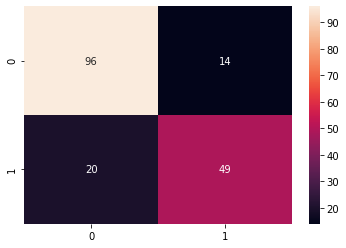

In [20]:
# Analyze the output using confusion matrix.

cm = confusion_matrix(y_test,X_test_prediction)
print("Confusion Matrix : \n", cm)
sns.heatmap(cm, annot=True)

##### 3. Classification Report 

In [21]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



##### 4. Checking result with new input 

In [22]:
# Checking results with completely new input
input_data = (3,0,35,0,0,8.05,0)  

# change this values to numpy array
input_data_np = np.asarray(input_data)

# reshape this to target dimension
input_data_reshaped = input_data_np.reshape(1,-1)

# Predict result
prediction = logreg.predict(input_data_reshaped)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Dead


### 📌Random Forest Classification

In [23]:
# Create Random Forest Classification Model on training dataset.
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)


RandomForestClassifier()

##### 1. Accuracy score of training and test dataset

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Testing model on training data and predict output
X_train_prediction = random_forest.predict(X_train)

# Find the accuracy score of training data
training_acc_rf = accuracy_score(y_train,X_train_prediction)*100
print('Accuracy score of Random forest classification on training data  : ', training_acc_rf)

# Testing model on test data and predict output
X_test_prediction = random_forest.predict(X_test)

# Find accuracy score of test data
test_acc_rf = accuracy_score(y_test, X_test_prediction)*100
print('Accuracy score of Random forest classification on test data : ', test_acc_rf)

Accuracy score of Random forest classification on training data  :  98.17415730337079
Accuracy score of Random forest classification on test data :  83.79888268156425


##### 2. Confusion Matrix

Confusion Matrix : 
 [[101   9]
 [ 20  49]]


<AxesSubplot:>

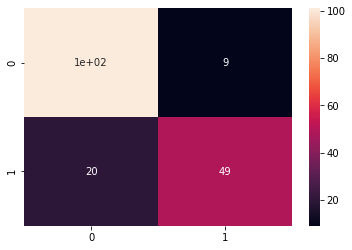

In [25]:
# Analyze the output using confusion matrix.
cm = confusion_matrix(y_test, X_test_prediction)
print("Confusion Matrix : \n", cm)
sns.heatmap(cm, annot=True,)

##### 3. Classification report 

In [26]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



##### 4. Checking result with new input

In [27]:
# Checking results with completely new input
input_data = (10,1,38,1,1,7.05,2)  

# change this values to numpy array
input_data_np = np.asarray(input_data)

# reshape this to target dimension
input_data_reshaped = input_data_np.reshape(1,-1)

# Predict result
prediction = random_forest.predict(input_data_reshaped)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Dead


### 📌Decision Tree 

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Build model
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  

y_pred = decision_tree.predict(X_test) 

# Find Accuracy
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("Accuracy score of decision tree classification model:",acc_decision_tree)

Accuracy score of decision tree classification model: 98.17


### 📌K Nearest Neighbor

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Build model
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)  

# Find Accuracy
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("Accuracy score of KNN classification model :",acc_knn)

Accuracy score of KNN classification model : 87.92


### 📝Final result 

In [30]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','Decision Tree','K Nearest Neighbor'],
    'Score': [training_acc_logreg, training_acc_rf,acc_decision_tree,acc_knn]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(4)

,Model
Score,
98.174157,Random Forest
98.170000,Decision Tree
87.920000,K Nearest Neighbor
80.056180,Logistic Regression


**Conclusion:
From above results Random Forest Classification model has highest accuracy score.This will best suits to our dataset.**